# Adaline with mini-batch stochastic gradient descent

### Setup

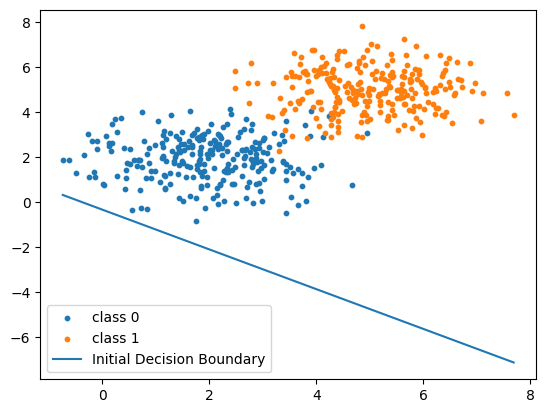

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

seed = 69
n_samples = 512
centers = [[2, 2], [5, 5]]
n_classes = len(centers)

data, labels = make_blobs(n_samples=n_samples, centers=centers, random_state=seed)

Y = np.where(labels == 0, -1, 1)
X = np.hstack((np.ones((n_samples, 1)), data))


fig, ax = plt.subplots()

for n_class in range(n_classes):
    ax.scatter(
        data[labels == n_class, 0],
        data[labels == n_class, 1],
        s=10,
        label=f"class {n_class}",
    )

W = np.random.uniform(low=-1, high=1, size=3)
x_linspace = np.linspace(np.min(data[:, 0]), np.max(data[:, 0]), 100)

intercept = -W[0] / W[2]
slope = -W[1] / W[2]
boundary = slope * x_linspace + intercept
ax.plot(x_linspace, boundary, label="Initial Decision Boundary")

ax.legend()


In [17]:
def error_sse(errors):
    return np.sum(np.square(errors)) / 2


eta = 0.01
epoch = 0
max_epoch = 1000


total_error = np.zeros(max_epoch)

while epoch < max_epoch:
    adaline_output = X @ W
    errors = Y - adaline_output
    total_error[epoch] = error_sse(errors)

    if total_error[epoch] == 0:
        break
    else:
        rand_perm = np.random.permutation(range(Y.shape[0]))
        for xi, yi in zip(X[rand_perm], Y[rand_perm]):
            error = yi - xi @ W
            delta_w = eta * error * xi
            W += delta_w
    epoch += 1


print(f"Converged in {epoch} epochs")
print(f"Final weights: {W}")

Converged in 1000 epochs
Final weights: [-1.84955006  0.26869866  0.26908155]


Text(0.5, 1.0, 'Error vs Epoch')

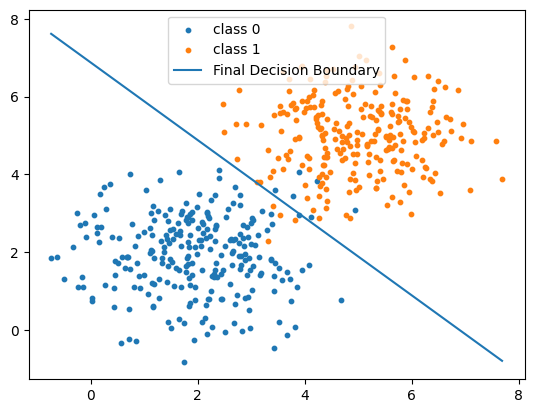

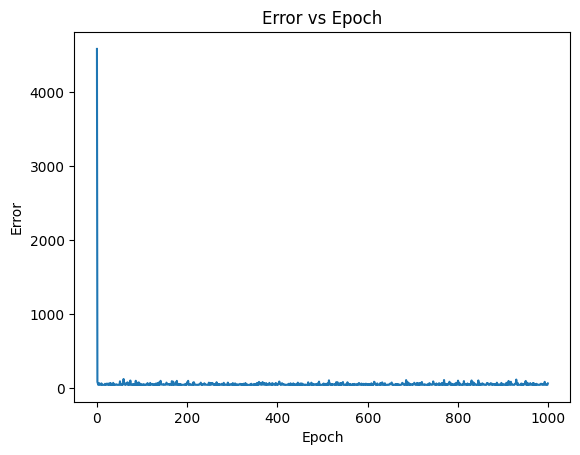

In [18]:
fig, ax = plt.subplots()

for n_class in range(n_classes):
    ax.scatter(
        data[labels == n_class, 0],
        data[labels == n_class, 1],
        s=10,
        label=f"class {n_class}",
    )

x_linspace = np.linspace(np.min(data[:, 0]), np.max(data[:, 0]), 100)
intercept = -W[0] / W[2]
slope = -W[1] / W[2]
boundary = slope * x_linspace + intercept
ax.plot(x_linspace, boundary, label="Final Decision Boundary")

ax.legend()


fig, ax = plt.subplots()

ax.plot(range(epoch), total_error[:epoch])
ax.set_xlabel("Epoch")
ax.set_ylabel("Error")
ax.set_title("Error vs Epoch")